In [130]:
# Import dependencies
import numpy as np
from tensorflow import keras
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

# set seed
keras.utils.set_random_seed(42)


In [131]:
# load the data and divide it into train/test split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [132]:
# Scale images into the [0 1] range | Normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make images with size (28,28,1)
# Le CNN necessitano le immagini con 3 dimensioni: width, height, channels
# -1 => Expand last dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# check shape
print(x_train.shape, x_test.shape)


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [133]:
# convert class array into one-hot representation
# (1 element per class in the vector with flags 0/1)
num_classes = 10;
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# we have seen this class is 5
print(y_train.shape)
print(y_train[0])


(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [134]:
# Model/data parameters
num_classes = 10
# Dimensions of the image
input_shape = (28,28,1) 

model = keras.Sequential([
	keras.Input(shape=input_shape),
	layers.Conv2D(10, kernel_size=3, activation='relu'),
	# pool_size: dimensione su cui effettuare il pooling
	layers.MaxPool2D(pool_size=2),

	# 10 * 20 * 3x3 +20
	layers.Conv2D(20, kernel_size=3, activation='relu'),
	layers.MaxPool2D(pool_size=2),

	layers.Flatten(),
	
	layers.Dropout(0.2),
	layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_111 (Conv2D)             │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_108               │ (None, 13, 13, 10)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 11, 11, 20)     │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_109               │ (None, 5, 5, 20)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_52 (Flatten)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,930 (27.07 KB)

 Trainable params: 6,930 (27.07 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

# Validation used to select the best model during training
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8306 - loss: 0.5607 - val_accuracy: 0.9578 - val_loss: 0.1486
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9522 - loss: 0.1593 - val_accuracy: 0.9727 - val_loss: 0.1003
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9641 - loss: 0.1153 - val_accuracy: 0.9765 - val_loss: 0.0791
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9696 - loss: 0.0956 - val_accuracy: 0.9803 - val_loss: 0.0683
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9746 - loss: 0.0825 - val_accuracy: 0.9814 - val_loss: 0.0641
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9761 - loss: 0.0753 - val_accuracy: 0.9839 - val_loss: 0.0569
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9787 - loss: 0.0698 - val_accuracy: 0.9845 - val_loss: 0.0549
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9801 - loss: 0.0642 - val_accuracy: 0.

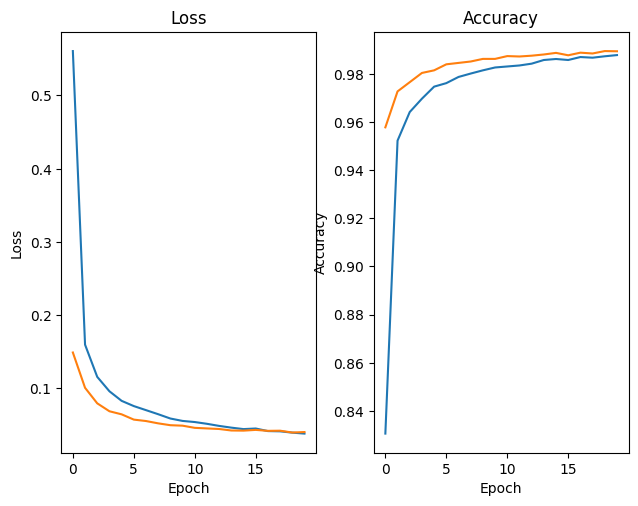

In [136]:
def plot_performance(history):
  fig, ax = plt.subplots(1, 2)
  fig.tight_layout()
  train_acc = history.history['accuracy']
  valid_acc = history.history['val_accuracy']
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')
  ax[0].plot(train_loss)
  ax[0].plot(valid_loss)
  ax[1].set_title('Accuracy')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')
  ax[1].plot(train_acc)
  ax[1].plot(valid_acc)
  plt.show()

plot_performance(history)


## Evaluation

In [137]:
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss: ", score[0])
print("test accuracy: ", score[1])

test loss:  0.031877558678388596
test accuracy:  0.9884999990463257
